# Optimizadores
Onjetivo: Conocer los diferentes optimizadores para entrenar redes neuronales
- Referencia: https://arxiv.org/abs/1412.6980
- SGD es un algoritmo que se emplea para minimizar una función objetivo, respecto a algunos parámetros. Este proceso es iterativo, tomando en cuenta un parámetro de learning rate, que establece que tanto se actualizan los parámetros.
- Una variante de SGD efectiva es Adam (Estimación de Momentum Adaptativo), también se emplean RMSProp, Adadelta y Adagrad.

### Se itera para encontrar el valor mínimo de una función utilizando la dirección del gradiente
- Se busca el valor mínimo de $J(x) = x sin(x^2)$ 

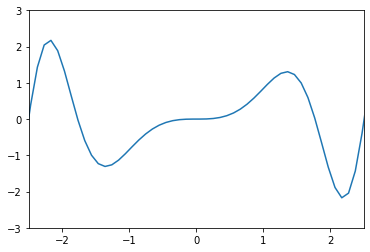

In [28]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)

def fn(x):# funcion
    return x*np.sin(x*x)

y = list(map(fn, x))

plt.plot(x, y)
plt.ylim(-3, 3)
plt.xlim(-2.5, 2.5)
plt.show()

- Se selecciona el número de iteraciones = 10 y el learning rate = 0.01
- La posición inicial se denota con 'ini'

In [2]:
def dif(x): ##derivada de función
    return (np.sin(x*x) + 2*x*x*np.cos(x*x)) 

In [3]:
def history(ini, lr, it = 10):
    history = []
    history.append(ini)
    x = ini
    for _ in range(0, it):# n iteraciones
        x = x - lr*dif(x)
        history.append(x)
    return history

In [4]:
h=history(1.5,0.01,10)

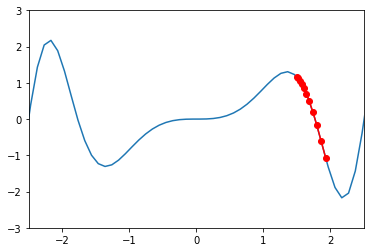

In [5]:
x = np.linspace(-5, 5, 100)
yh = list(map(fn, h))

plt.plot(x, y, '-')
plt.plot(h, yh,'o-', c='red')
plt.ylim(-3, 3)
plt.xlim(-2.5, 2.5)
plt.show()

- Aumentando iteraciones a 100

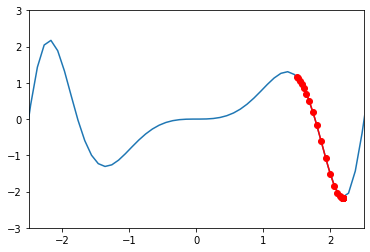

In [6]:
h=history(1.5,0.01,100)
x = np.linspace(-5, 5, 100)
yh = list(map(fn, h))

plt.plot(x, y, '-')
plt.plot(h, yh,'o-', c='red')
plt.ylim(-3, 3)
plt.xlim(-2.5, 2.5)
plt.show()

- Un learning rate bajo puede requerir mayor número de iteraciones

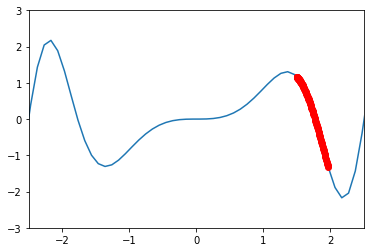

In [7]:
h=history(1.5,0.001,100)# 100 iteraciones
x = np.linspace(-5, 5, 100)
yh = list(map(fn, h))

plt.plot(x, y, '-')
plt.plot(h, yh,'o-', c='red')
plt.ylim(-3, 3)
plt.xlim(-2.5, 2.5)
plt.show()

- Diferente punto de inicio

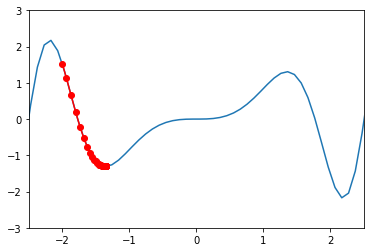

In [8]:
h=history(-2,0.01,100)# 100 iteraciones
x = np.linspace(-5, 5, 100)
yh = list(map(fn, h))

plt.plot(x, y, '-')
plt.plot(h, yh,'o-', c='red')
plt.ylim(-3, 3)
plt.xlim(-2.5, 2.5)
plt.show()

- Más iteraciones

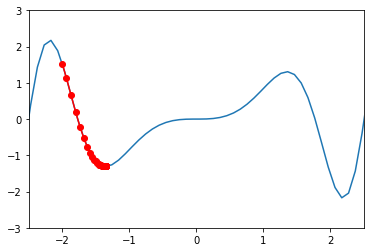

In [9]:
h=history(-2,0.01,1000)# 1000 iteraciones
x = np.linspace(-5, 5, 100)
yh = list(map(fn, h))

plt.plot(x, y, '-')
plt.plot(h, yh,'o-', c='red')
plt.ylim(-3, 3)
plt.xlim(-2.5, 2.5)
plt.show()

- La función no puede encontrar el mínimo, es por eso que existen variantes del algoritmo

# Tensorflow optimizadores
- Tensorflow implementa varios optimizadores

- Se clasificarán imágenes. Los pixeles son la entrada de la red neuronal. Al finalizar el entrenamiento, la red neuronal habrá aprendido a reconocer dígitos. 

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
K.clear_session()

mnist = keras.datasets.mnist
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape) 
print(y_test.shape) 

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Leer Dataset

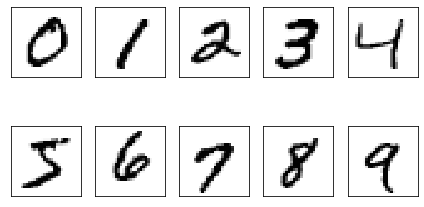

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

- Se modifica la forma de los datos de 2-d (n, 28, 28) a 1-d (n, 784)

In [13]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


print(x_train.shape) # (60000, 784)
print(y_train.shape) # (60000,)
print(x_test.shape)  # (10000, 784)
print(y_test.shape)  # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [14]:
epoch = 70
verbose = 0
batch = 50

## Adam

In [15]:
def make_model():
    model = Sequential()
    
    model.add(Dense(40, input_shape = (784, ), activation = 'relu'))   
    model.add(Dense(40, activation = 'relu')) 
    model.add(Dense(40, activation = 'relu')) 
    model.add(Dense(10, activation = 'softmax'))   

    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [16]:
model = make_model()

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                31400     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                410       
Total params: 35,090
Trainable params: 35,090
Non-trainable params: 0
_________________________________________________________________


In [17]:
history1 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3,
                    epochs = epoch, verbose = verbose)


In [18]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

10000/1 - 0s - loss: 0.1586 - accuracy: 0.9633

Test acccuracy: 0.9633


## SGD

In [19]:
def make_model():
    model = Sequential()
    
    model.add(Dense(40, input_shape = (784, ), activation = 'relu'))   
    model.add(Dense(40, activation = 'relu')) 
    model.add(Dense(40, activation = 'relu'))  
    model.add(Dense(10, activation = 'softmax'))   

    
    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [20]:
model = make_model()

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 40)                31400     
_________________________________________________________________
dense_5 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_6 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                410       
Total params: 35,090
Trainable params: 35,090
Non-trainable params: 0
_________________________________________________________________


In [21]:
history2 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3,
                    epochs = epoch, verbose = verbose)


In [22]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

10000/1 - 0s - loss: 2.3024 - accuracy: 0.1135

Test acccuracy: 0.1135


## Adagrad

In [23]:
def make_model():
    model = Sequential()
    
    model.add(Dense(40, input_shape = (784, ), activation = 'relu'))   
    model.add(Dense(40, activation = 'relu')) 
    model.add(Dense(40, activation = 'relu'))   
    model.add(Dense(10, activation = 'softmax'))   

    
    model.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [24]:
model = make_model()

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 40)                31400     
_________________________________________________________________
dense_9 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_10 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                410       
Total params: 35,090
Trainable params: 35,090
Non-trainable params: 0
_________________________________________________________________


In [25]:
history3 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3,
                    epochs = epoch, verbose = verbose)


In [26]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

10000/1 - 1s - loss: 0.4100 - accuracy: 0.8699

Test acccuracy: 0.8699


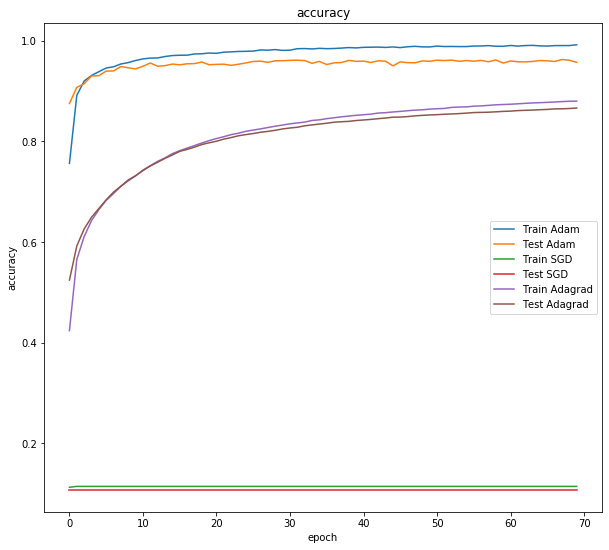

In [27]:
#plot
plt.figure(figsize=(10,9))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])


plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.legend(['Train Adam', 'Test Adam',
            'Train SGD', 'Test SGD',
            'Train Adagrad', 'Test Adagrad'])

plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()


- Experimentar con diferentes parámetros y optimizadores para obtener mejores resultados y menor tiempo de entrenamiento